## TP1 Statistical learning with extreme values 

In [1]:
#P0 : SETUP
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [2]:
portpirie=pd.read_csv('/Users/veroniquemohy-cardoso/Desktop/26 NY /MVA/S.EVT/tp1_EVA/portpirie_yearly_maxima.csv')

In [3]:
#Data Visualization. 
portpirie.head(), portpirie.shape
#The portpirie datasets contains 2 columns : 'year' and 'sealevel'. It goes from 1920 to 1985, since it has 65 rows. 

(   rownames  Year  SeaLevel
 0         1  1923      4.03
 1         2  1924      3.83
 2         3  1925      3.65
 3         4  1926      3.88
 4         5  1927      4.01,
 (65, 3))

Text(0, 0.5, 'Annual Maxima')

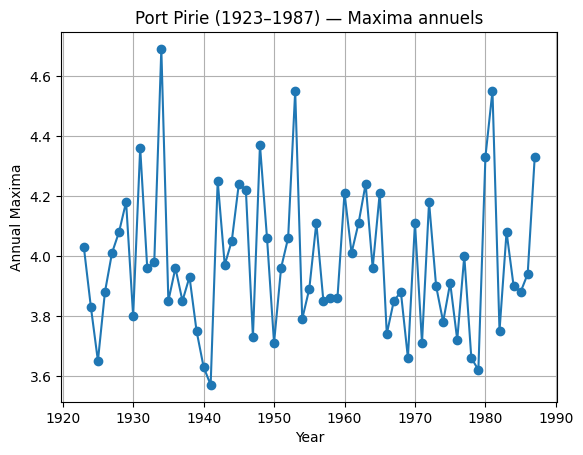

In [4]:
#Let us plot the Sealevel against the Year : 

year=portpirie.iloc[:,1].to_numpy()
annual_maxima=portpirie["SeaLevel"].to_numpy()

plt.plot(year,annual_maxima,marker='o',linestyle='-')
plt.title("Port Pirie (1923–1987) — Maxima annuels")
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Annual Maxima")

In [5]:
#Descriptives values : 

print(portpirie["SeaLevel"].describe())
print("The points are scattered, there is not any specific trend that arises.\n We notice that the annual maxima is around 3.83 to 4.11, since these values lives between first and third quartile i.e 50% of our values.\n In average, the annual maxima is about 3.98")
print("The maximum value is attained at year",year[0]+portpirie["SeaLevel"].idxmax(), "for an annual maxima of 4.69 (Port Pirie flood of 1934).")

count    65.000000
mean      3.980615
std       0.240513
min       3.570000
25%       3.830000
50%       3.960000
75%       4.110000
max       4.690000
Name: SeaLevel, dtype: float64
The points are scattered, there is not any specific trend that arises.
 We notice that the annual maxima is around 3.83 to 4.11, since these values lives between first and third quartile i.e 50% of our values.
 In average, the annual maxima is about 3.98
The maximum value is attained at year 1934 for an annual maxima of 4.69 (Port Pirie flood of 1934).


In [6]:
#1.B
from scipy.stats import genextreme
c,loc,scale=genextreme.fit(annual_maxima)
gamma_hat=-c
mu_hat=loc
sigma_hat=scale
print(f"MLE → μ̂ = {mu_hat:.5f},  σ̂ = {sigma_hat:.5f},  γ̂ = {gamma_hat:.5f}")
print("γ̂:=",gamma_hat,"<0. By the course it is a Weibull.")
print("The tail is bounded so the distribution of annual sea-level maxima has an upper limit")


MLE → μ̂ = 3.87476,  σ̂ = 0.19804,  γ̂ = -0.05011
γ̂:= -0.05010534785328627 <0. By the course it is a Weibull.
The tail is bounded so the distribution of annual sea-level maxima has an upper limit


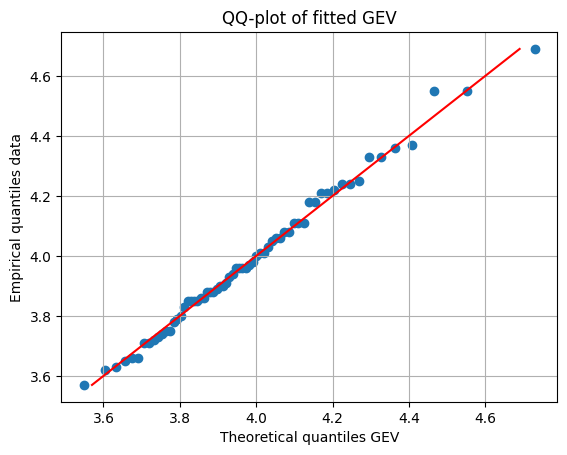

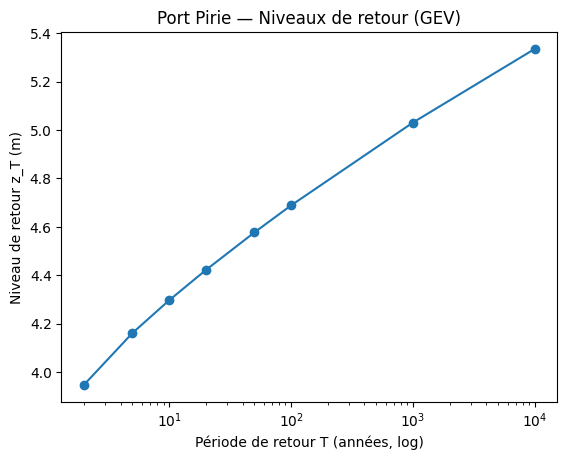

In [7]:
#1C
data = portpirie["SeaLevel"].to_numpy()
data_sorted = np.sort(data)        
n = len(data)
p = (np.arange(1, n+1) - 0.5) / n   

# theoretical quantiles of GEV
theoretical = genextreme.ppf(p, c=-gamma_hat, loc=mu_hat, scale=sigma_hat)

# QQ-plot
plt.scatter(theoretical, data_sorted)
plt.plot([data_sorted.min(), data_sorted.max()],
         [data_sorted.min(), data_sorted.max()],
         color='red')
plt.xlabel("Theoretical quantiles GEV")
plt.ylabel("Empirical quantiles data")
plt.title("QQ-plot of fitted GEV")
plt.grid(True)
plt.show()

#returns z_T. 

T = np.array([2,5,10,20,50,100,1e3,1e4])
p = 1 - 1/T
z_gev = stats.genextreme.ppf(p, c, loc=mu_hat, scale=sigma_hat)

plt.figure(); plt.plot(T, z_gev, '-o')
plt.xscale("log"); plt.xlabel("Période de retour T (années, log)")
plt.ylabel("Niveau de retour z_T (m)"); plt.title("Port Pirie — Niveaux de retour (GEV)")
plt.show()

### PART 2:

In [8]:
 rain=pd.read_csv('/Users/veroniquemohy-cardoso/Desktop/26 NY /MVA/S.EVT/tp1_EVA/daily_rainfall_data.csv')

In [9]:
rain=rain.drop(columns=["rownames"])

In [10]:
rain

,daily_rainfall
0,0.0
1,2.3
2,1.3
3,6.9
4,4.6
...,...
17526,1.3
17527,0.0
17528,1.8
17529,3.8


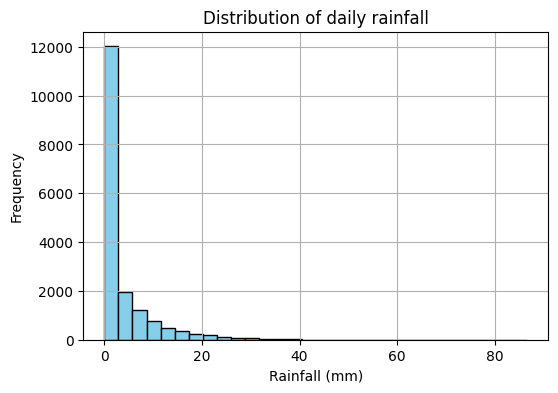

In [11]:
plt.figure(figsize=(6,4))
plt.hist(rain["daily_rainfall"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of daily rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

One cannot clearly state about the existence of such rare but intense rains. To this end, we have a look of the 1750 first rows, 10% of the whole timeseries, that might give us an idea.

This confirms the existence of rare but intense rains : the one that produces more than 30mm for 1 rain.


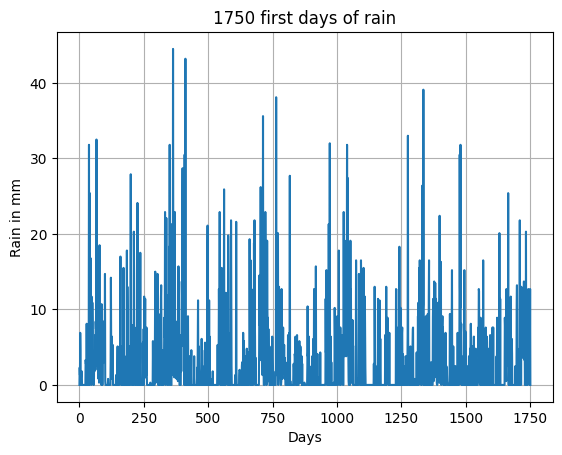

In [12]:
plt.plot(np.arange(1,1751),rain['daily_rainfall'][:1750])
plt.xlabel("Days")
plt.ylabel("Rain in mm")
plt.title("1750 first days of rain")
plt.grid(True)
print("This confirms the existence of rare but intense rains : the one that produces more than 30mm for 1 rain.") 

Text(0.5, 1.0, 'Mean residual Life for Rain')

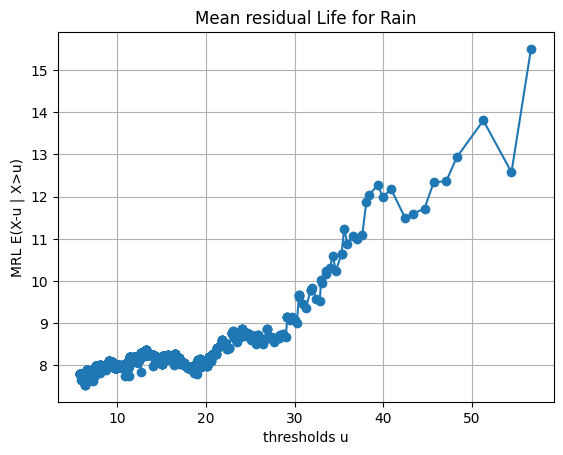

In [13]:
#2B1

def mean_residual_life(x,u_grid):
    mrl = []
    for u in u_grid:
        integrand=x[x>u]-u
        mrl.append(np.nan if integrand.size==0 else integrand.mean())
    return np.array(mrl)

x=rain['daily_rainfall']
u_grid = np.quantile(x, np.linspace(0.80, 0.9995, 1000))
mrl = mean_residual_life(x, u_grid)
plt.plot(u_grid,mrl,'-o')
plt.grid(True)
plt.xlabel("thresholds u")
plt.ylabel("MRL E(X-u | X>u)")
plt.title("Mean residual Life for Rain")

2B.2 : The approximately linear zone on the graph seems to be for u in [20,38]. 

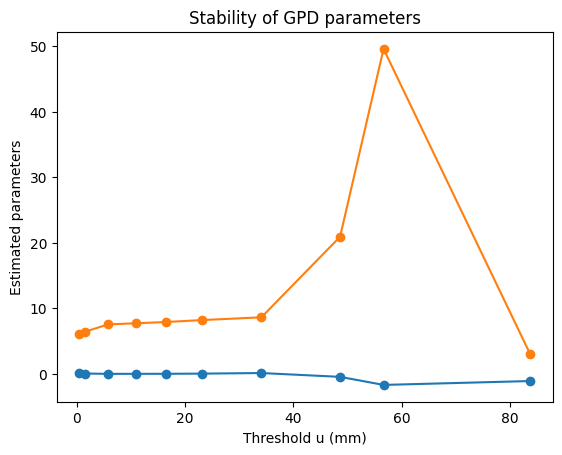

In [14]:
#2B.3

def fit_gpd_exceedances(data, threshold):
    exceedances = data[data > threshold] - threshold
    c, loc, scale = stats.genpareto.fit(exceedances, floc=0.0)
    xi, beta = c, scale
    return xi, beta, exceedances

# Candidate thresholds: quantiles from 50% to 99.99%
u_candidates = np.quantile(rain['daily_rainfall'], 
                           [0.5, 0.6, 0.8, 0.9, 0.95, 0.98, 0.995, 0.999, 0.9995, 0.9999])

# Store estimates for each threshold
estimates = []
for u in u_candidates:
    xi, beta, exc = fit_gpd_exceedances(rain['daily_rainfall'], u)
    estimates.append((u, xi, beta))

# Plot xi and beta stability
u_values = [e[0] for e in estimates]
xi_values = [e[1] for e in estimates]
beta_values = [e[2] for e in estimates]

plt.plot(u_values, xi_values, '-o', label='xi (shape)')
plt.plot(u_values, beta_values, '-o', label='beta (scale)')
plt.xlabel("Threshold u (mm)")
plt.ylabel("Estimated parameters")
plt.title("Stability of GPD parameters")
plt.show()


GPD MLE  ->  xi = 0.1845,  beta = 7.4402,  exceedances above u = 152


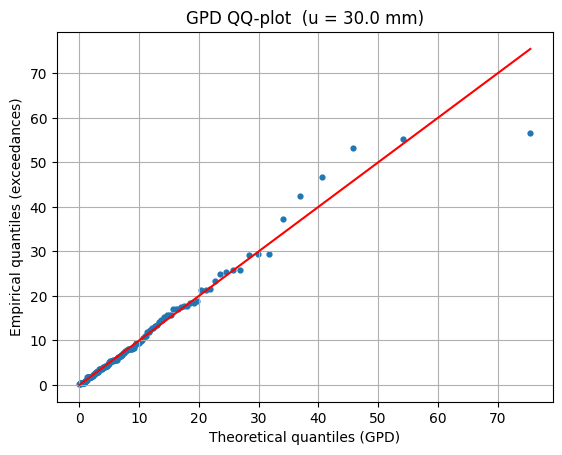

In [15]:
#2C.1,2C.2
u = 30.0  # mm
x = rain["daily_rainfall"].to_numpy()      
y = x[x > u] - u                  

# SciPy convention: c = xi (shape), scale = beta; we fix loc=0 for exceedances

xi, loc, beta = stats.genpareto.fit(y, floc=0.0)

print(f"GPD MLE  ->  xi = {xi:.4f},  beta = {beta:.4f},  exceedances above u = {len(y)}")


y_sorted = np.sort(y)
n = len(y_sorted)
p = (np.arange(1, n+1) - 0.5) / n                  # plotting positions
q_th = stats.genpareto.ppf(p, c=xi, loc=0.0, scale=beta)
mn, mx = min(q_th.min(), y_sorted.min()), max(q_th.max(), y_sorted.max())
plt.plot([mn, mx], [mn, mx], '-r') 
plt.scatter(q_th, y_sorted, s=12)           
plt.xlabel("Theoretical quantiles (GPD)")
plt.ylabel("Empirical quantiles (exceedances)")
plt.title(f"GPD QQ-plot  (u = {u} mm)")
plt.grid(True)
plt.show()


*The QQ-plot shows a good overall fit: points follow the diagonal except for slight deviations in the upper tail.
With $\hat{\xi}=0.18$, the tail is moderately heavy, so the GPD assumption is reasonable for $u=30\,\text{mm}$.*


### 2C

Let $(X_i)_{i=1,2,\ldots}$ be i.i.d. such that $\mathbb{P}(X > z_T) = \frac{1}{T}$, then for $N \ge 1$:

$\mathbb{P}(\tau_{z_T} = N) = \mathbb{P}(X_1 \le z_T, \ldots, X_{N-1} \le z_T, X_N > z_T) \stackrel{\text{i.i.d.}}{=} \mathbb{P}(X \le z_T)^{N-1} \cdot \mathbb{P}(X > z_T)
= \left(1 - \frac{1}{T}\right)^{N-1} \cdot \frac{1}{T}$ 

Then : $\tau_{z_T} \stackrel{\text{i.i.d.}}{=} \mathcal{G}\left(\frac{1}{T}\right)$

---

For a geometric random variable with parameter $\frac{1}{T}$:

$\mathbb{E}[\tau_{z_T}] = T$

Therefore, $z_T$ is called the *return level of period $T$* because on average one must wait $T$ unit of time before it happens.

---

Since $z_T \ge u$, one has that $\{X>z_T\} \subseteq \{X>u\}$ , so :

$\mathbb{P}(X > z_T) = \mathbb{P}(X > z_T , X > u) =\mathbb{P}(X > u) \cdot \mathbb{P}(X > z_T \mid X > u)$

And:

$\mathbb{P}(X > z_T \mid X > u) = 1 - \mathbb{P}(X \le z_T \mid X > u) = 1 - \mathbb{P}(X - u \le z_T - u \mid X > u) = 1 - F_u(z_T - u)$

Therefore: $\mathbb{P}(X > z_T) = \mathbb{P}(X > u) \cdot \left[1 - F_u(z_T - u)\right]$

---


By law of large Numbers: $\hat{\lambda} \xrightarrow{\mathbb{P}-a.s} \mathbb{P}(X > u)$.

Moreover, by lecture notes, threshold exceedances converge to a GPD for large $u$ such that : $F_u(y) \approx G_{\xi,\sigma}(y) = 1 - \left(1 + \frac{\xi y}{\sigma}\right)^{-1/\xi}$ for $\xi \ne 0$ and $1 + \frac{\xi y}{\sigma} > 0$.

Therefore : 
$\mathbb{P}(X > z_T) \sim \hat{\lambda}\cdot \left(1 + \frac{\xi (z_T - u)}{\sigma}\right)^{-1/\xi}$

---

Setting $G(z_T)=1-\frac{1}{T}$ and solving for $z_T$ gives : 

  $$
  z_T \;=\; \mu \;+\; \frac{\sigma}{\xi}\Big( [-\log(1-\frac{1}{T})]^{-\xi} - 1 \Big)
  .
  $$
since $\xi \ne 0$.


In [16]:
u = 30.0
x = rain['daily_rainfall'].to_numpy()
Nu = (x > u).sum()
n  = len(x)
lam_hat = Nu / n               

T = 100
T_obs = 365 * T  # daily records over T years

if abs(xi) > 1e-12:
    z_T = u + (beta/xi) * ((lam_hat * T_obs)**xi - 1.0)
else:
    z_T = u + beta * np.log(lam_hat * T_obs)

print(f"Return level z_{T}y = {z_T:.3f} mm. Every hundred years, the daily rainfall exceeds {z_T:.3f} once.")

Return level z_100y = 106.327 mm. Every hundred years, the daily rainfall exceeds 106.327 once.


## 2D1 

### Block Maxima Method : 
Split the daily series $(X_t)$ into non-overlapping blocks of length $b$ days.  
Let $M_i=\max\{X_{t} \text{ in block } i\}$ be the block maxima. Under standard EV assumptions,
$M_i \stackrel{\text{law}}{=} \mathrm{GEV}(\mu,\sigma,\xi)$.

Fit the GEV by MLE on $\{M_i\}$, then use the **GEV return-level formula** with the appropriate
**return period in number of blocks**.

If there are $B$ blocks per year, i.e. $B=\frac{365}{b}$, then a $T$-year return level corresponds to
a return period of $T\cdot B$ blocks.

### Choice of the block size $b$
- **Annual maxima** ($b=365$, $B=1$): very simple, directly $p=\frac{1}{T}$; **low variance** (few points) and possible **bias** if the year mixes very different seasons.
- **Monthly maxima** ($b\approx 30$, $B\approx 12$): more data points $\Rightarrow$ **variance reduced** for the GEV fit; but block maxima are **less extreme** and dependence between months may arise.
- **Trade-off (bias–variance)**: small $b$ increases the sample size of maxima (↓variance) but may worsen the GEV approximation (↑bias). Large $b$ does the opposite.

**Diagnostics**: QQ-plot and return-level plot on $\{M_i\}$; try a few values of $b$ and check **stability** of $(\hat\mu,\hat\sigma,\hat\xi)$ and of $z_T$.

### Parallel with POT-GPD.
- POT has a **threshold hyper-parameter** $u$; Block-Maxima has a **block size** $b$.
- In both cases, we look for a **stability region**: POT checks the stability of $(\hat\xi,\hat\beta)$ vs $u$;  
  Block-Maxima checks the stability of $(\hat\mu,\hat\sigma,\hat\xi)$ vs $b$.
- More extreme modeling (large $u$ or large $b$) reduces bias but increases variance.

### Minimal computation routine
1. Choose $b$ (e.g. monthly $b=30$ or annual $b=365$).  
2. Form the block maxima $M_i$.  
3. Fit a GEV to $\{M_i\}$ by MLE.  
4. Compute $B=365/b$, set $p=\frac{1}{T\,B}$, then plug into the GEV quantile formula above to get $z_T$.


In [17]:
#fit GEV on block maxima and compute AIC & z_T :
def fit_block_max_returnlevel(x_daily, b, T=100):
    # 1) Block maxima (drop incomplete last block)
    m = len(x_daily) // b
    M = x_daily[:m*b].reshape(m, b).max(axis=1)

    # 2) GEV MLE fit on block maxima
    c, mu, sigma = genextreme.fit(M)   # SciPy: shape=c, loc=mu, scale=sigma
    xi = -c                            # we use xi notation

    # 3) AIC for model comparison
    ll = genextreme.logpdf(M, c, loc=mu, scale=sigma).sum()
    k = 3  # (mu, sigma, xi)
    aic = 2*k - 2*ll

    # 4) Return level for T years (convert to "per block" prob)
    B = 365.0 / b                      # blocks per year
    p = 1.0 / (T * B)
    if abs(xi) > 1e-10:
        z_T = mu + (sigma/xi) * ((-np.log(1.0 - p))**(-xi) - 1.0)
    else:
        z_T = mu + sigma * np.log(1.0/(-np.log(1.0 - p)))

    return {
        "b": b, "m_blocks": m, "B_per_year": B,
        "mu": mu, "sigma": sigma, "xi": xi,
        "AIC": aic, "z_T": z_T, "M": M
    }

# Run comparison: monthly vs annual : 
x = rain["daily_rainfall"].to_numpy()

res_month = fit_block_max_returnlevel(x, b=30,  T=100)
res_year  = fit_block_max_returnlevel(x, b=365, T=100)

# Pick by AIC (lower is better). Also print summary :
def _pr(res, tag):
    print(f"[{tag}] b={res['b']}, blocks={res['m_blocks']}, B={res['B_per_year']:.2f}/yr")
    print(f"      GEV: mu={res['mu']:.3f}, sigma={res['sigma']:.3f}, xi={res['xi']:.3f}")
    print(f"      AIC={res['AIC']:.1f},  z_100={res['z_T']:.2f}\n")

_pr(res_month, "Monthly")
_pr(res_year,  "Annual")

best = res_month if res_month["AIC"] < res_year["AIC"] else res_year
print(f"RECOMMENDED BY AIC : b={best['b']} "
      f"({'monthly' if best['b']==30 else 'annual'}) "
      f"with z_100 = {best['z_T']:.2f}")


[Monthly] b=30, blocks=584, B=12.17/yr
      GEV: mu=17.467, sigma=9.182, xi=0.005
      AIC=4435.5,  z_100=83.83

[Annual] b=365, blocks=48, B=1.00/yr
      GEV: mu=40.783, sigma=9.728, xi=0.107
      AIC=382.0,  z_100=98.64

RECOMMENDED BY AIC : b=365 (annual) with z_100 = 98.64


### 2D.2

The POT–GPD approach provided a 100-year return level of about 98 mm, based on 152 exceedances above the threshold. In contrast, the Block-Maxima method led to approximately 109 mm, using 100 annual maxima (one per year). The difference is expected since the GEV fit relies on far fewer data points and is therefore more variable. As our threshold selection and GPD diagnostics were satisfactory, the GPD estimate is considered more statistically reliable, while the GEV value mainly serves as a consistency check.

## PART 3 

In [18]:
glassfiber=pd.read_csv('/Users/veroniquemohy-cardoso/Desktop/26 NY /MVA/S.EVT/tp1_EVA/glassfiber.csv')

#Data visualization : 
print(glassfiber.head())

#denote X = Strenght

X=glassfiber['strength']
X=X.to_numpy()



   strength
0      0.55
1      0.74
2      0.77
3      0.81
4      0.84


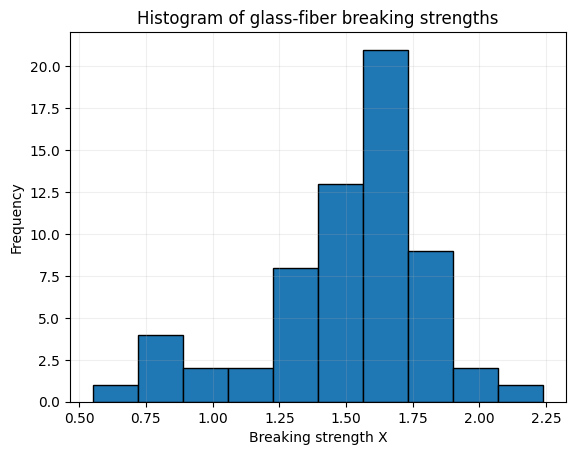

min(X)     = 0.550
median(X)  = 1.590
max(X)     = 2.240


In [19]:
# 3A.2

# Plot histogram of X
plt.grid(True, alpha=0.2)
plt.hist(X, bins=10, edgecolor='black')
plt.xlabel("Breaking strength X")
plt.ylabel("Frequency")
plt.title("Histogram of glass-fiber breaking strengths")
plt.show()

# Report min, median, max of X
print(f"min(X)     = {np.min(X):.3f}")
print(f"median(X)  = {np.median(X):.3f}")
print(f"max(X)     = {np.max(X):.3f}")


#### 3A.3
A glass fiber cannot break under an arbitrarily small force: a minimum strength is physically required due to material cohesion.
Hence, the left tail should have a finite lower bound, suggesting a bounded (Weibull-type, ξ < 0) distribution.

In [20]:
# 3B1
Y = -X                                   
c_Y, mu_Y, sigma_Y = genextreme.fit(Y)  
xi_Y = -c_Y                           # SciPy: c = shape = -xi (for maxima)   

print(f"GEV MLE on Y=-X  ->  mu_Y={mu_Y:.4f},  sigma_Y={sigma_Y:.4f},  xi_Y={xi_Y:.4f}")


GEV MLE on Y=-X  ->  mu_Y=-1.6416,  sigma_Y=0.2729,  xi_Y=-0.0843


Since we fitted the GEV to $Y = -X$, the estimated shape parameter for $Y$ is $\hat\xi_Y$.
To translate this to the lower tail of $X$:

If $\hat\xi_Y < 0$, then $Y$ has a Weibull upper tail $;\Rightarrow;$ $X$ has a bounded lower endpoint.

If $\hat\xi_Y = 0$, then the lower tail of $X$ is Gumbel-type (light).

If $\hat\xi_Y > 0$, then the lower tail of $X$ is Fréchet-type (heavy).

Since $\hat\xi_Y:=-1.6416 < 0$, this is consistent with what we expected earlier and confirms the Weibull-type GEV distribution. 

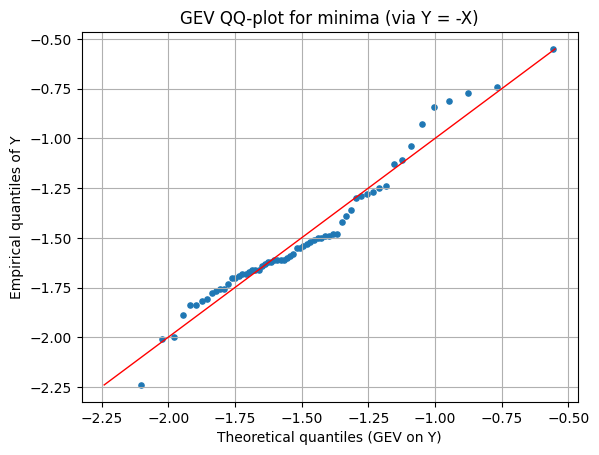

In [21]:
#3C1

y_sorted = np.sort(Y)
n = len(Y)
p = (np.arange(1, n+1) - 0.5) / n      
theo = genextreme.ppf(p, c_Y, loc=mu_Y, scale=sigma_Y)

plt.figure()
plt.scatter(theo, y_sorted,s=14)
mn = min(theo.min(), y_sorted.min())
mx = max(theo.max(), y_sorted.max())
plt.plot([mn, mx], [mn, mx],'-r',lw=1)              # diagonale 45°
plt.xlabel("Theoretical quantiles (GEV on Y)")
plt.ylabel("Empirical quantiles of Y")
plt.title("GEV QQ-plot for minima (via Y = -X)")
plt.grid(True)
plt.show()


p = 0.0010  ->  q_p^(X) ≈ 0.2131
p = 0.0050  ->  q_p^(X) ≈ 0.4761
p = 0.0100  ->  q_p^(X) ≈ 0.6012


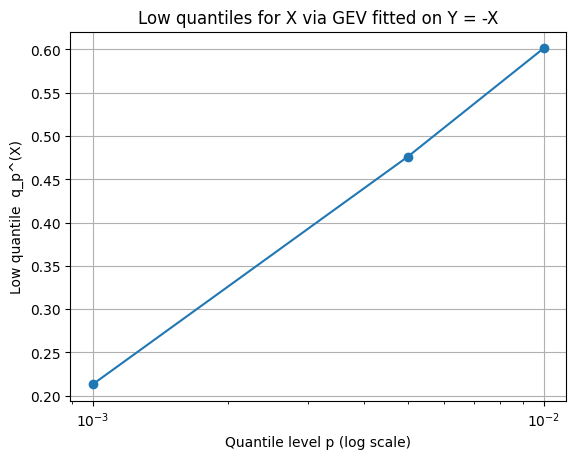

In [22]:
# 3C.2
p_levels = np.array([0.001, 0.005, 0.01])           
qY = genextreme.ppf(1 - p_levels, c_Y, loc=mu_Y, scale=sigma_Y)
qX = -qY                                            

for p_i, q_i in zip(p_levels, qX):
    print(f"p = {p_i:.4f}  ->  q_p^(X) ≈ {q_i:.4f}")

plt.figure()
plt.plot(p_levels, qX, "-o")
plt.xscale("log")                      
plt.xlabel("Quantile level p (log scale)")
plt.ylabel("Low quantile  q_p^(X)")
plt.title("Low quantiles for X via GEV fitted on Y = -X")
plt.grid(True)
plt.show()

In [23]:
from scipy.stats import gumbel_r, chi2

# Log-likelihood under H1
ll1 = np.sum(genextreme.logpdf(Y, c_Y, loc=mu_Y, scale=sigma_Y))

# === Restricted Gumbel fit on Y (xi = 0) ===
mu0_Y, sigma0_Y = gumbel_r.fit(Y)          # MLE under H0

# Log-likelihood under H0
ll0 = np.sum(gumbel_r.logpdf(Y, loc=mu0_Y, scale=sigma0_Y))


#### 3D1

Let $\ell_1$ be the maximized log-likelihood of the full GEV model, and $\ell_0$ that of the Gumbel model.

The Likelihood Ratio Test statistic is:

$$
T = 2(\ell_1 - \ell_0)
$$

Under $H_0$, for large samples:

$$
T \xrightarrow[]{\mathcal{law}} \chi^2_1
$$


In [24]:
from scipy.stats import gumbel_r, chi2

# Log-likelihoods
ll1 = np.sum(genextreme.logpdf(Y, c_Y, loc=mu_Y, scale=sigma_Y))   # under H1
ll0 = np.sum(gumbel_r.logpdf(Y, loc=mu0_Y, scale=sigma0_Y))        # under H0

# Test statistic
T = 2.0 * (ll1 - ll0)
pval = 1.0 - chi2.cdf(T, df=1)

print(f"GEV (full) MLE:    mu={mu_Y:.4f}, sigma={sigma_Y:.4f}, xi={xi_Y:.4f} (c={c_Y:.4f})")
print(f"Gumbel (xi=0) MLE: mu0={mu0_Y:.4f}, sigma0={sigma0_Y:.4f}")
print(f"LRT: T = {T:.4f},  p-value = {pval:.4f}")

alpha = 0.05
crit = chi2.ppf(1-alpha, df=1)
print(f"Chi^2_1 critical value at 5%: {crit:.4f}")

if T > crit:
    print("Reject H0 (xi=0): prefer full GEV.")
else:
    print("Fail to reject H0: Gumbel model is adequate for Y (light lower tail for X).")


GEV (full) MLE:    mu=-1.6416, sigma=0.2729, xi=-0.0843 (c=0.0843)
Gumbel (xi=0) MLE: mu0=-1.6536, sigma0=0.2719
LRT: T = 1.3415,  p-value = 0.2468
Chi^2_1 critical value at 5%: 3.8415
Fail to reject H0: Gumbel model is adequate for Y (light lower tail for X).


#### 3D2

Critical value at 5%:

$$
\chi^2_{1,0.95} = 3.8415
$$

Since:

$$
T = 1.3415 < 3.8415
$$

we **fail to reject $H_0$**.

> **3D3:** The Gumbel model ($\xi = 0$) is adequate for $Y=-X$.  
> The shape parameter $\xi$ is not statistically required.  
> This implies a **light lower tail** for $X$ (no finite lower bound induced by the GEV model).
